C:\Users\akhil\miniconda3\envs\openmm-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


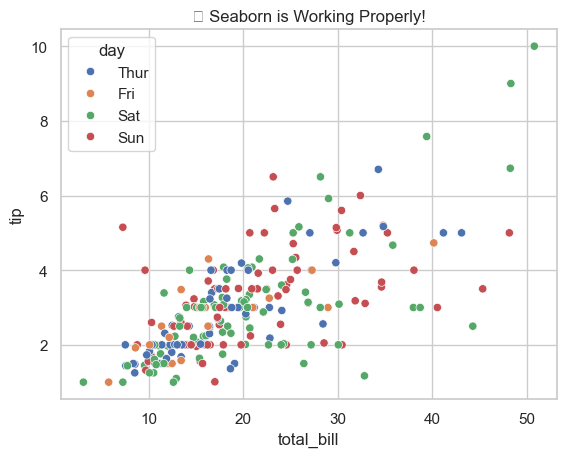

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quick style test
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
plt.title("✅ Seaborn is Working Properly!")
plt.show()


C:\Users\akhil\AppData\Local\Temp\ipykernel_30252\3640153106.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=data, palette='cool')


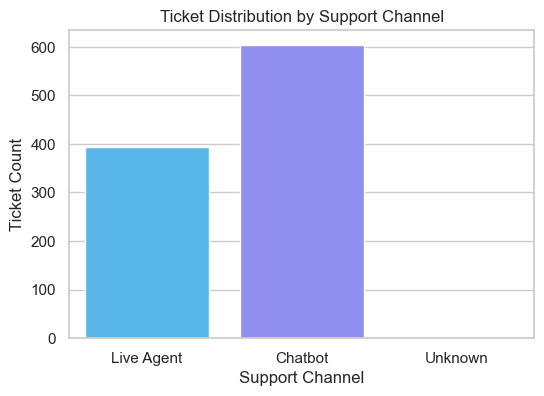

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('Uber_Customer_Support_Tickets_Prepared.csv')

plt.figure(figsize=(6,4))
sns.countplot(x='Channel', data=data, palette='cool')
plt.title("Ticket Distribution by Support Channel")
plt.xlabel("Support Channel")
plt.ylabel("Ticket Count")
plt.show()


C:\Users\akhil\AppData\Local\Temp\ipykernel_30252\771543492.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=data, palette='cool')


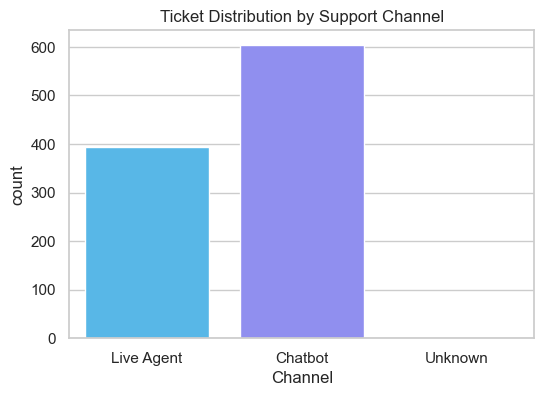

C:\Users\akhil\AppData\Local\Temp\ipykernel_30252\771543492.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='CSAT_Score', data=data, palette='Set2', estimator='mean')


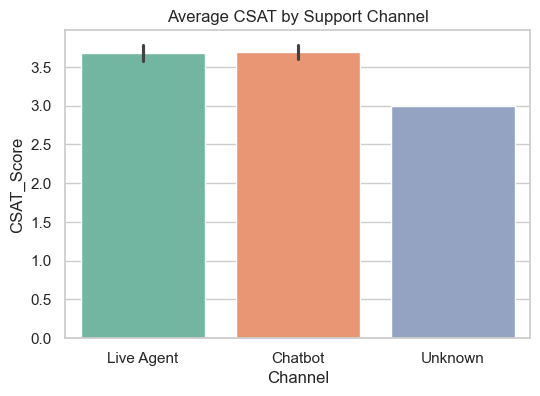

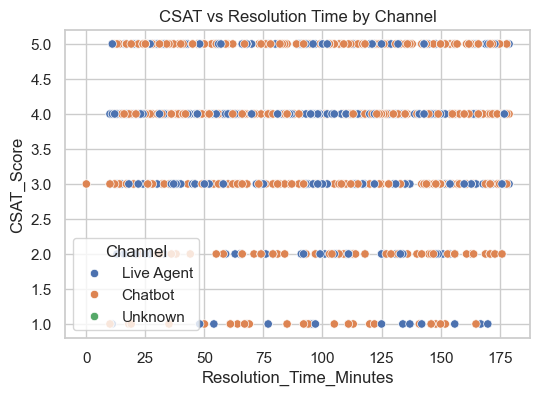

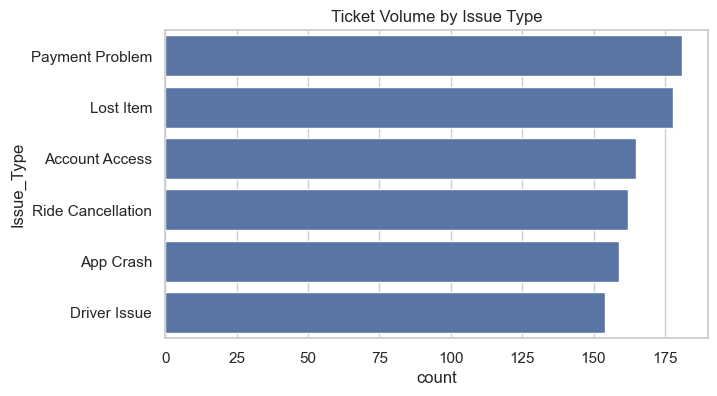

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Uber_Customer_Support_Tickets_Prepared.csv')

# --- Ticket Distribution by Channel ---
plt.figure(figsize=(6,4))
sns.countplot(x='Channel', data=data, palette='cool')
plt.title("Ticket Distribution by Support Channel")
plt.show()

# --- Average CSAT by Channel ---
plt.figure(figsize=(6,4))
sns.barplot(x='Channel', y='CSAT_Score', data=data, palette='Set2', estimator='mean')
plt.title("Average CSAT by Support Channel")
plt.show()

# --- CSAT vs Resolution Time ---
plt.figure(figsize=(6,4))
sns.scatterplot(x='Resolution_Time_Minutes', y='CSAT_Score', hue='Channel', data=data)
plt.title("CSAT vs Resolution Time by Channel")
plt.show()

# --- Issue Type Breakdown ---
plt.figure(figsize=(7,4))
sns.countplot(y='Issue_Type', data=data, order=data['Issue_Type'].value_counts().index)
plt.title("Ticket Volume by Issue Type")
plt.show()


In [7]:
import sys
!{sys.executable} -m pip install statsmodels --upgrade


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.6 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.6 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.6 MB 2.9 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.6 MB 2.9 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 2.9 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 2.9 MB/s eta 0:00:02
   ----------------------------- ---------- 7.1/9.6 MB 2.9 MB/s eta 0:00:01
   -----------------------

C:\Users\akhil\AppData\Local\Temp\ipykernel_30252\2725242326.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')


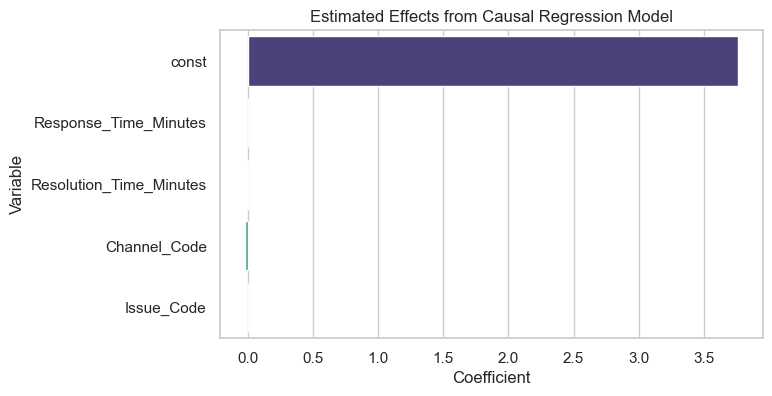

In [8]:
import statsmodels.api as sm

# Prepare regression
X = data[['Response_Time_Minutes', 'Resolution_Time_Minutes', 'Channel_Code', 'Issue_Code']]
y = data['CSAT_Score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Coefficient Plot
coef_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values
})

plt.figure(figsize=(7,4))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title("Estimated Effects from Causal Regression Model")
plt.show()


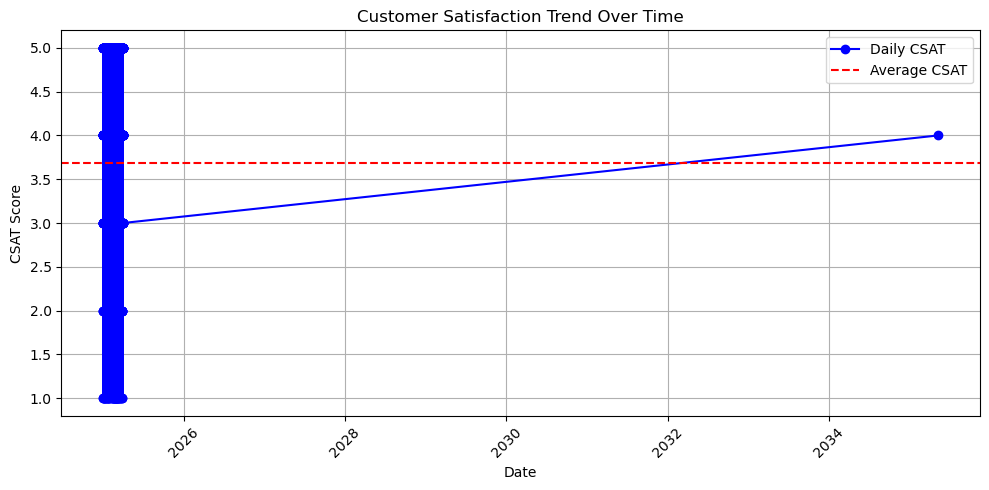

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('Uber_Customer_Support_Tickets_Prepared.csv')

# Convert Created_At to datetime
data['Created_At'] = pd.to_datetime(data['Created_At'], dayfirst=True)

# Sort by date (important for time series)
data = data.sort_values('Created_At')

# Plot CSAT trend
plt.figure(figsize=(10,5))
plt.plot(data['Created_At'], data['CSAT_Score'], marker='o', color='blue', label='Daily CSAT')
plt.axhline(y=data['CSAT_Score'].mean(), color='red', linestyle='--', label='Average CSAT')

# Labels & styling
plt.title("Customer Satisfaction Trend Over Time")
plt.xlabel("Date")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


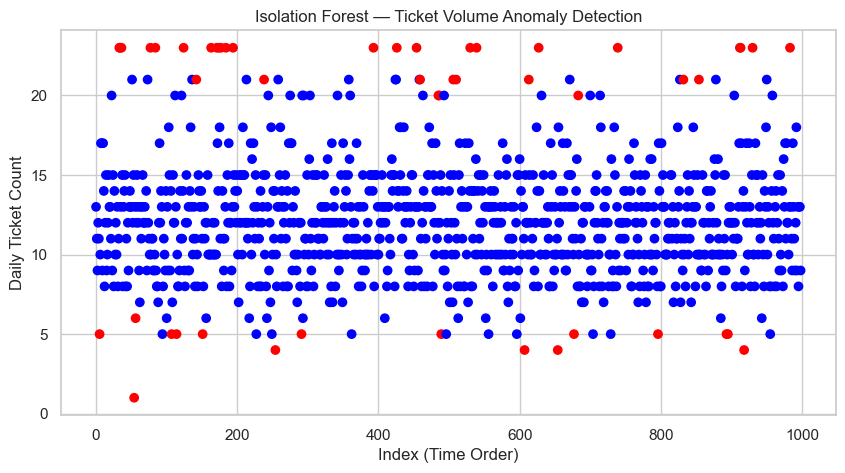

In [9]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = model.fit_predict(data[['Daily_Ticket_Count', 'Resolution_Time_Minutes']])

plt.figure(figsize=(10,5))
plt.scatter(data.index, data['Daily_Ticket_Count'], 
            c=data['anomaly'].map({1: 'blue', -1: 'red'}))
plt.title("Isolation Forest — Ticket Volume Anomaly Detection")
plt.xlabel("Index (Time Order)")
plt.ylabel("Daily Ticket Count")
plt.show()
